Artificial Neural Networks <br>
Nikos Periklis Chourdas - tp4774 <br>
nikos.hourdas@gmail.com 

In [41]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as sk 
import neurolab as neuro



importing data set 

In [42]:

dataset_names = ['Age', 'Year operation', 'Axillary nodes detected', 'Survival status']

dataset = pd.read_csv("haberman.data",names = dataset_names) 
# {debug} check to make sure data is loaded correctly
# print(dataset)

exploring the Dataset 

In [43]:
dataset.head(5)

,Age,Year operation,Axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


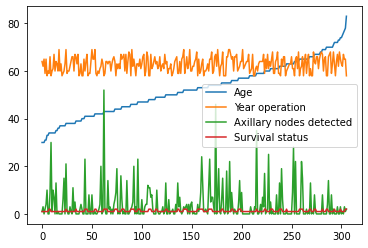

In [44]:
dataset.plot()
plt.show()

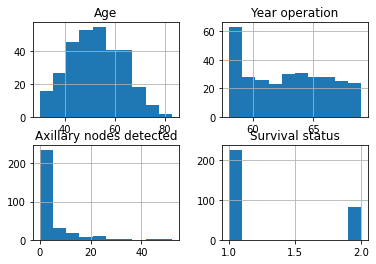

In [45]:
dataset.hist()
plt.show()

visualization using scatter plot 

In [46]:
dataset.shape

(306, 4)

In [47]:

temp_Array = dataset.values

X = temp_Array[:,:3]
target = temp_Array[:,3]

In [48]:
# Debugging 

# np.shape(dataset)
# print(dataset.columns)

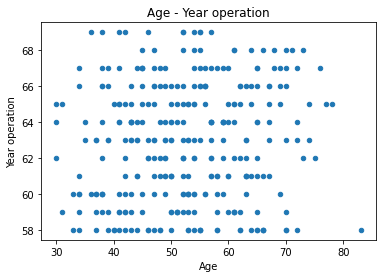

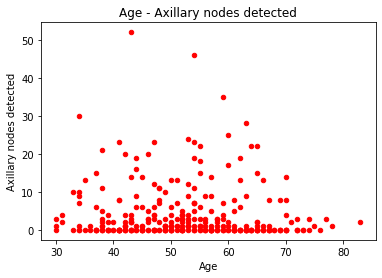

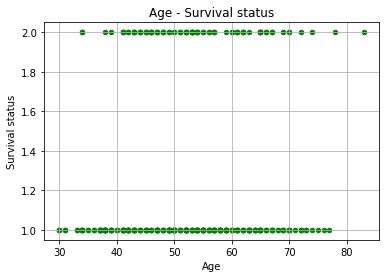

In [49]:


dataset.plot(kind = "scatter" , x = "Age" , y = "Year operation", title = "Age - Year operation")

dataset.plot(kind = "scatter" , x = "Age" , y = "Axillary nodes detected",color = "red",title = "Age - Axillary nodes detected")

dataset.plot(kind = "scatter" , x = "Age" , y = "Survival status",color="green", title = "Age - Survival status")

plt.grid()
plt.show()


Target Transform

In [55]:
dataset.isnull().sum()

Age                        0
Year operation             0
Axillary nodes detected    0
Survival status            0
dtype: int64

In [56]:
target.shape

(306,)

In [ ]:
target = np.empty([])

import libraries for data split 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# starting split rate 80% training data - 20% test set 

Dataset_Train, Dataset_Test , Target_Train , Target_Test = train_test_split(dataset,target,test_size = 0.2 , random_state = 42)

Dataset_Train = MinMaxScaler().fit_transform(Dataset_Train)

Dataset_Test = MinMaxScaler().fit_transform(Dataset_Test)

In [51]:
# debug 
# print(Dataset_Train)
# print(Dataset_Test)

network Training 

In [52]:
#  feed-forward backpropagation network - newff 

np.random.seed(42)

net = neuro.net.newff(neuro.tool.minmax(dataset),[4,3])

# print(len(net.layers))

net.layers[-1].transf = neuro.trans.LogSig()  #output layer 
net.layers[0].transf = neuro.trans.LogSig() #hidden layer 
net.layers[1].transf = neuro.trans.LogSig() #hidden layer 
# max number of layers allowed to use 

error = net.trainf = neuro.train.train_rprop(net,Dataset_Train,Target_Train , epochs = 1000 ,show = 100 , lr = 0.0005, goal = 0.005 )

plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();


AssertionError: 